In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from pathlib import Path
import struct
import json
import seaborn as sns
import open3d as o3d

In [60]:
def draw_point_cloud(df:pd.DataFrame):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(1,1,1,projection="3d")
    ax.scatter(df["x"],df["y"],df["z"],c=df[["r","g","b"]]/255,s=0.1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ele=10
    azm=10
    ax.view_init(elev=ele, azim=azm)

def show_in_o3d(df):
    pcd=o3d.geometry.PointCloud()
    pcd.points=o3d.utility.Vector3dVector(df[["x","y","z"]].to_numpy())
    pcd.colors=o3d.utility.Vector3dVector(df[["r","g","b"]].to_numpy()/255)
    o3d.visualization.draw_geometries([pcd])
    return pcd

In [2]:
df=pd.read_csv("../../../data/lastPointCloud.csv")

In [17]:
factor=20
df_downsampled=df.iloc[::factor,:]

In [78]:
show_in_o3d(df)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


PointCloud with 2212165 points.

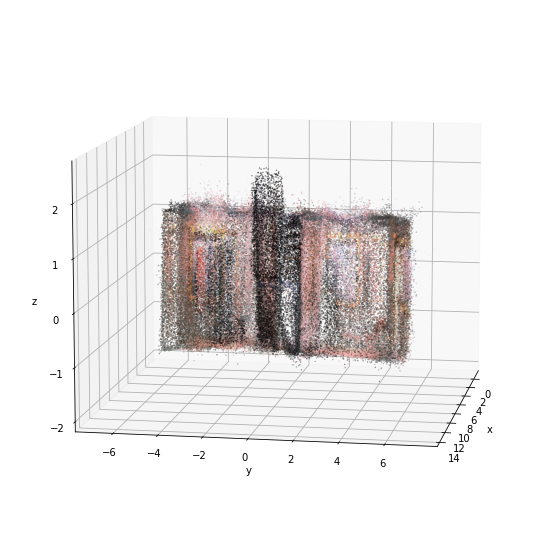

In [18]:
draw_point_cloud(df_downsampled)

In [22]:
def theta_1(r):
    """
    exp(-r) decrease function w.r.t r
    """
    return np.exp(-r)

In [44]:
def algorithm_LOP(p,x,theta_func,iteration=5):
    new_x=np.zeros_like(x)
    
    for i in range(len(x)):
        dist=theta_func(p-x[i])
        new_x[i]=(p*dist).sum(axis=0)/dist.sum()

    for k in range(iteration):
        alpha=
    return new_x

In [62]:
p=df_downsampled.iloc[::5,:][["x","y","z"]].to_numpy()[:100,:]
x=df_downsampled.iloc[::5,:][["x","y","z"]].to_numpy()[:100,:]

In [61]:
show_in_o3d(df_downsampled.iloc[::5,:])

PointCloud with 22122 points.

In [36]:
dist=theta_1(np.linalg.norm(p-x[0],axis=1,keepdims=True))

In [40]:
dist

array([[1.        ],
       [0.94755737],
       [0.8513004 ],
       ...,
       [0.01215148],
       [0.01241912],
       [0.01212716]])

In [43]:
(p*dist).sum(axis=0)/dist.sum()

array([ 3.98569746,  0.98137766, -0.42165417])

In [45]:
p

array([[ 3.50298858,  1.21465445, -1.43142819],
       [ 3.55142117,  1.19111419, -1.43279922],
       [ 3.66327596,  1.20701694, -1.41848695],
       ...,
       [ 6.73177624,  0.60540843,  1.51043034],
       [ 6.70952225,  0.64163119,  1.50946927],
       [ 6.7606926 ,  0.72559452,  1.50398421]])

In [46]:
x

array([[ 3.50298858,  1.21465445, -1.43142819],
       [ 3.55142117,  1.19111419, -1.43279922],
       [ 3.66327596,  1.20701694, -1.41848695],
       ...,
       [ 6.73177624,  0.60540843,  1.51043034],
       [ 6.70952225,  0.64163119,  1.50946927],
       [ 6.7606926 ,  0.72559452,  1.50398421]])

In [77]:
alpha=np.zeros((len(x),len(p)))
for i in range(len(x)):
    dist=np.linalg.norm(p-x[i],axis=1,keepdims=True)
    alpha[i]= (theta_1(dist)/(dist+0.00001)).flatten()